# Movie Recommendation System

## Imports

In [10]:
# Importing Numpy and Pandas for Data Wrangling and Data Preprocessing
import pandas as pd
import numpy as np

# Importing tools for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Library used for Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Import model selection libraries
from sklearn.model_selection import GridSearchCV



# Library used for ML Model Implementation
from sklearn.linear_model import LogisticRegression

# Import evaluation metric libraries
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Library for changing formats
import ast

# Library to skip warnings
import warnings

%matplotlib inline

## Dataset Information

In [11]:
#Load Dataset from Github Repository
df = pd.read_csv("https://raw.githubusercontent.com/Kaustav2500/movieRecommendation/main/movies_recommendation.csv")

# General Info about the Dataset
print("Dataset Shape: \n")
print("\nDataset Info: \n", df.info)
print("\nMissing Values: \n")
print(df.isnull().sum())
print("\nDuplicate Values: \n")
print(df.duplicated().sum())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nDataset Example: \n")
print(df.head())

Dataset Shape: 


Dataset Info: 
 <bound method DataFrame.info of       index     budget                                    genres  \
0         0  237000000  Action Adventure Fantasy Science Fiction   
1         1  300000000                  Adventure Fantasy Action   
2         2  245000000                    Action Adventure Crime   
3         3  250000000               Action Crime Drama Thriller   
4         4  260000000          Action Adventure Science Fiction   
...     ...        ...                                       ...   
4798   4798     220000                     Action Crime Thriller   
4799   4799       9000                            Comedy Romance   
4800   4800          0             Comedy Drama Romance TV Movie   
4801   4801          0                                       NaN   
4802   4802          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie

## Data Cleaning

In [3]:
# Dataset Columns
print("Columns of the Dataset: \n")
df.columns

Columns of the Dataset: 



Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [4]:
# Handling useless columns
df.drop('homepage', axis=1, inplace=True)
df.dropna(inplace=True)

df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


## Exploratory Data Analysis

### Chart 1 - Distribution of Vote

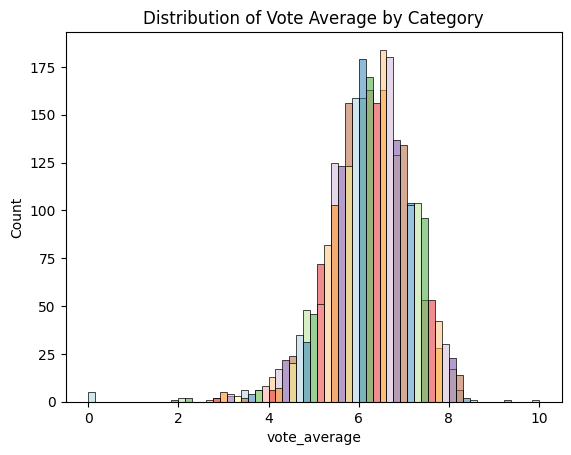

In [5]:
sns.histplot(data=df, x='vote_average', hue='vote_average', palette="Paired", legend=False) 
plt.title('Distribution of Vote Average by Category')
plt.show()

### Chart 2 - Distribution of Votes w.r.t other Characteristics

C:\Users\kaust\AppData\Local\Temp\ipykernel_14772\774711799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, ax=axs[0,1], palette='mako')
C:\Users\kaust\AppData\Local\Temp\ipykernel_14772\774711799.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_production_company', y='vote_average', data=df_top10, palette='mako', ax=axs[2, 0],
C:\Users\kaust\AppData\Local\Temp\ipykernel_14772\774711799.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_production_country', y='vote_average', d

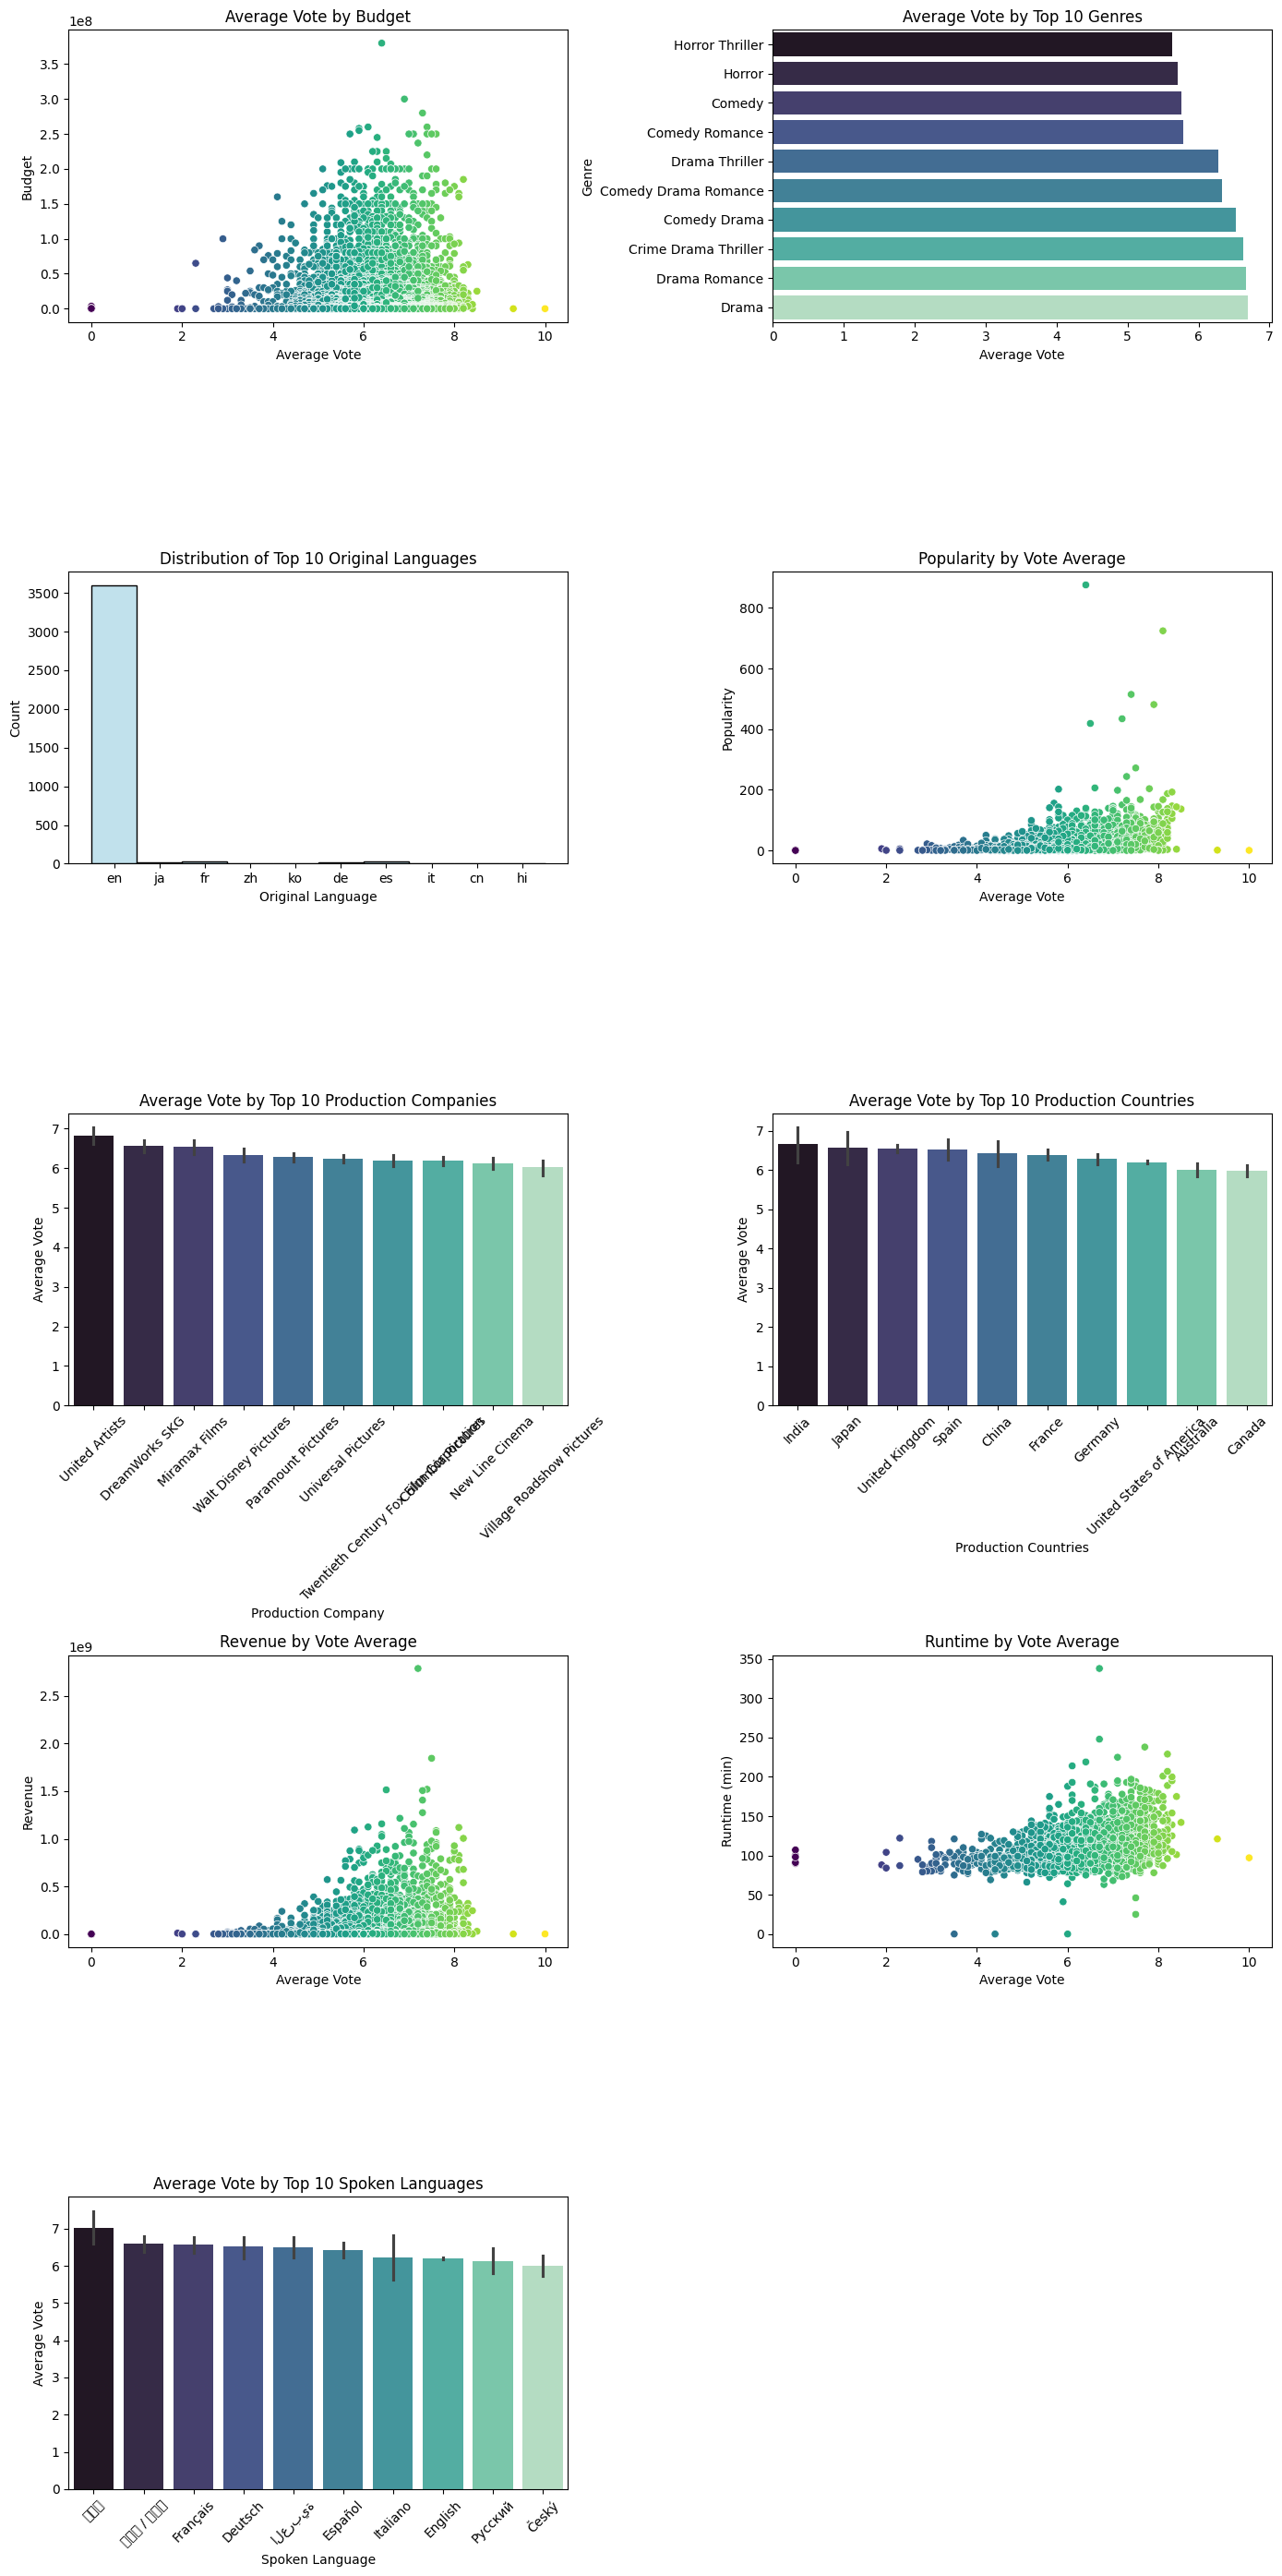

In [6]:
# Creating subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 28))

# Plot of Budget by Vote Average
sns.scatterplot(x='vote_average', y='budget', data=df, hue='vote_average', palette='viridis', legend=False, ax=axs[0,0])
axs[0,0].set_title('Budget by Vote Average')
axs[0,0].set_title('Average Vote by Budget')
axs[0,0].set_xlabel('Average Vote')
axs[0,0].set_ylabel('Budget')

# Plot of Average Vote by Top 10 Genres
top_genres = df['genres'].value_counts().head(10).index
genre_avg = df[df['genres'].isin(top_genres)].groupby('genres')['vote_average'].mean().sort_values()
sns.barplot(x=genre_avg.values, y=genre_avg.index, ax=axs[0,1], palette='mako')
axs[0,1].set_title('Average Vote by Top 10 Genres')
axs[0,1].set_xlabel('Average Vote')
axs[0,1].set_ylabel('Genre')

# Plot of Distribution of Top 10 Original Languages
top_10_langs = df['original_language'].value_counts().head(10).index
df_top10 = df[df['original_language'].isin(top_10_langs)]
sns.histplot(x='original_language', data=df_top10, legend=False, ax=axs[1,0], color='Lightblue')
axs[1,0].set_title('Distribution of Top 10 Original Languages')
axs[1,0].set_xlabel('Original Language')
axs[1,0].set_ylabel('Count')

# Plot of Popularity by Vote Average
sns.scatterplot(x='vote_average', y='popularity', data=df, hue='vote_average', palette='viridis', legend=False, ax=axs[1,1])
axs[1,1].set_title('Popularity by Vote Average')
axs[1,1].set_xlabel('Average Vote')
axs[1,1].set_ylabel('Popularity')

# PLot of Average Vote by Top 10 Production Companies
def extract_first_company(x):
    try:
        companies = ast.literal_eval(x)
        if isinstance(companies, list) and len(companies) > 0:
            return companies[0].get('name', None)
    except:
        return None
df['main_production_company'] = df['production_companies'].apply(extract_first_company)
top_10_companies = df['main_production_company'].value_counts().head(10).index
df_top10 = df[df['main_production_company'].isin(top_10_companies)]
sns.barplot(x='main_production_company', y='vote_average', data=df_top10, palette='mako', ax=axs[2, 0],
    order=df_top10.groupby('main_production_company')['vote_average'].mean().sort_values(ascending=False).index)
axs[2, 0].set_title('Average Vote by Top 10 Production Companies')
axs[2, 0].set_xlabel('Production Company')
axs[2, 0].set_ylabel('Average Vote')
axs[2, 0].tick_params(axis='x', rotation=45)

# Plot of Average Vote by Top 10 Production Countries
def extract_first_country(x):
    try:
        countries = ast.literal_eval(x)
        if isinstance(countries, list) and len(countries) > 0:
            return countries[0].get('name', None)
    except:
        return None
df['main_production_country'] = df['production_countries'].apply(extract_first_company)
top_10_countries = df['main_production_country'].value_counts().head(10).index
df_top10 = df[df['main_production_country'].isin(top_10_countries)]
sns.barplot(x='main_production_country', y='vote_average', data=df_top10, palette='mako', ax=axs[2, 1],
    order=df_top10.groupby('main_production_country')['vote_average'].mean().sort_values(ascending=False).index)
axs[2, 1].set_title('Average Vote by Top 10 Production Countries')
axs[2, 1].set_xlabel('Production Countries')
axs[2, 1].set_ylabel('Average Vote')
axs[2, 1].tick_params(axis='x', rotation=45)

# Plot of Revenue by Vote Average
sns.scatterplot(x='vote_average', y='revenue', data=df, hue='vote_average', palette='viridis', legend=False, ax=axs[3,0])
axs[3,0].set_title('Revenue by Vote Average')
axs[3,0].set_xlabel('Average Vote')
axs[3,0].set_ylabel('Revenue')

# Plot of Runtime by Vote Average
sns.scatterplot(x='vote_average', y='runtime', data=df, hue='vote_average', palette='viridis', legend=False, ax=axs[3,1])
axs[3,1].set_title('Runtime by Vote Average')
axs[3,1].set_xlabel('Average Vote')
axs[3,1].set_ylabel('Runtime (min)')

# Plot of Average Vote by Top 10 Spoken Languages
def extract_first_language(x):
    try:
        langs = ast.literal_eval(x)
        if isinstance(langs, list) and len(langs) > 0:
            return langs[0].get('name', None)
    except:
        return None
df['main_spoken_language'] = df['spoken_languages'].apply(extract_first_language)
top_10_languages = df['main_spoken_language'].value_counts().head(10).index
df_lang_top10 = df[df['main_spoken_language'].isin(top_10_languages)]
sns.barplot(x='main_spoken_language', y='vote_average', data=df_lang_top10, palette='mako', ax=axs[4,0],
    order=df_lang_top10.groupby('main_spoken_language')['vote_average'].mean().sort_values(ascending=False).index)
axs[4,0].set_title('Average Vote by Top 10 Spoken Languages')
axs[4,0].set_xlabel('Spoken Language')
axs[4,0].set_ylabel('Average Vote')
axs[4,0].tick_params(axis='x', rotation=45)

# Removing the unused subplot
axs[4,1].axis('off')

# Filtering warnings
warnings.filterwarnings("ignore", message="Passing `palette` without assigning `hue` is deprecated")

# Printing the plot
plt.tight_layout()
plt.show()


#### Obervations

* Most movies are rated average (5-7)
* English movies dominate the market
* There is no clear relation between the ratings of the movies and their other characteristics

## Data Preprocessing

In [7]:
# Create a copy to avoid modifying original
movies_df = df.copy()
    
# Create quality labels (high quality = 1, low quality = 0)
y_quality = (movies_df['vote_average'] >= 6.5).astype(int)
        
# Simple features for quality prediction
X_quality = movies_df[['budget', 'popularity', 'revenue', 'runtime', 'vote_count']].fillna(0)

# 1. Numerical features (budget, revenue, popularity, etc.)
numerical_features = ['budget', 'revenue', 'popularity', 'runtime', 'vote_count', 'vote_average']
numerical_data = movies_df[numerical_features].fillna(0)
    
# Normalize numerical features
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_data)
    
# 2. Language features (one-hot encoding)
language_dummies = pd.get_dummies(movies_df['original_language'], prefix='lang')
    
# 3. Production country features
country_dummies = pd.get_dummies(movies_df['main_production_country'], prefix='country')
    
# 4. Spoken language features
spoken_lang_dummies = pd.get_dummies(movies_df['main_spoken_language'], prefix='spoken')
    
# 5. Genre features (TF-IDF on genre strings)
genre_text = movies_df['genres'].fillna('').astype(str)
genre_vectorizer = TfidfVectorizer(max_features=50)
genre_features = genre_vectorizer.fit_transform(genre_text).toarray()
    
# 6. Keywords features
keyword_text = movies_df['keywords'].fillna('').astype(str)
keyword_vectorizer = TfidfVectorizer(max_features=100, min_df=2)
keyword_features = keyword_vectorizer.fit_transform(keyword_text).toarray()
    
# 7. Overview + Tagline text features
text_data = (movies_df['overview'].fillna('') + ' ' + movies_df['tagline'].fillna('')).values
text_vectorizer = TfidfVectorizer(max_features=100, stop_words='english', min_df=2)
text_features = text_vectorizer.fit_transform(text_data).toarray()
    
# 8. Production company features
company_dummies = pd.get_dummies(movies_df['main_production_company'].fillna('Unknown'), prefix='company').iloc[:, :30]  # Limit to top 30

# 9. ROI feature
roi = ((movies_df['revenue'] - movies_df['budget']) / (movies_df['budget'].replace(0, 1))).fillna(0)
roi_scaled = MinMaxScaler().fit_transform(roi.values.reshape(-1, 1))
    
# 10. Year and month features
dates = pd.to_datetime(movies_df['release_date'], errors='coerce')
year_scaled = MinMaxScaler().fit_transform(dates.dt.year.fillna(dates.dt.year.median()).values.reshape(-1, 1))
month_dummies = pd.get_dummies(dates.dt.month.fillna(0), prefix='month')

## ***ML Model Implementation***
* Logistic Regression
* Creating the main movie recommendation system



In [8]:
def create_movie_recommender(df):
    """
    Create a hybrid movie recommendation system combining ML predictions and content similarity
    
    Args:
        df: DataFrame with movie data
        trained_pipeline: Optional trained sklearn pipeline for quality prediction
    
    Returns:
        function: recommend_movies function
    """

    # Train model using LogisticRegression with GridSearchCV for best hyperparameters
    print("Training LogisticRegression with GridSearchCV to find best hyperparameters...")

    # Basic parameter grid for logistic regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    }

    # Use a simple logistic regression estimator
    logreg = LogisticRegression(max_iter=2000, random_state=42)
    gs = GridSearchCV(logreg, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=0)

    # Fit on the simple X_quality features used earlier
    gs.fit(X_quality, y_quality)
    trained_pipeline = gs.best_estimator_
    print(f"Best LogisticRegression params: {gs.best_params_}")

    
    # Get quality predictions for all movies
    X_for_prediction = movies_df[['budget', 'popularity', 'revenue', 'runtime', 'vote_count']].fillna(0)
    quality_predictions = trained_pipeline.predict_proba(X_for_prediction)[:, 1]  # Probability of being high quality
    movies_df['ml_quality_score'] = quality_predictions

    
    # Combine all features with appropriate weights
    feature_matrix = np.hstack([
        numerical_scaled * 2.0,                         # Weight: 2.0 - Important for similar scale
        language_dummies.values * 1.5,                  # Weight: 1.5 - Language similarity matters
        genre_features * 3.0,                           # Weight: 3.0 - Genres are very important
        keyword_features * 2.5,                         # Weight: 2.5 - Keywords indicate themes
        text_features * 1.0,                            # Weight: 1.0 - Content description
        country_dummies.values * 1.0,                   # Weight: 1.0 - Production country
        spoken_lang_dummies.values * 1.0,               # Weight: 1.0 - Languages spoken in the movie
        company_dummies.values * 0.8,                   # Weight: 0.8 - Production company
        roi_scaled * 1.2,                               # Weight: 1.2 - Success indicator
        year_scaled * 0.5,                              # Weight: 0.5 - Time period
        month_dummies.values * 0.3,                     # Weight: 0.3 - Seasonality 
        quality_predictions.reshape(-1, 1) * 2.5        # Weight: 2.5 - ML quality prediction
    ])
    
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(feature_matrix)
    
    # Create movie index mapping
    movie_indices = pd.Series(movies_df.index, index=movies_df['title'].str.lower()).to_dict()
    

    
    def recommend_movies(movie_name, top_n=3, show_details=True, min_quality_score=0.5):
        """
        Recommend similar movies using hybrid ML + content-based approach
        
        Args:
            movie_name: Name of the movie (case-insensitive)
            top_n: Number of recommendations to return
            show_details: Whether to print detailed information
            min_quality_score: Minimum ML quality score (0-1) for recommendations
        
        Returns:
            DataFrame with recommended movies
        """
        movie_name_lower = movie_name.lower()
        
        # Find the movie
        if movie_name_lower not in movie_indices:
            # Try partial matching
            matches = [title for title in movie_indices.keys() if movie_name_lower in title]
            if not matches:
                print(f"Movie '{movie_name}' not found in database")
                print("\nDid you mean one of these?")
                similar = movies_df[movies_df['title'].str.lower().str.contains(
                    movie_name_lower.split()[0] if movie_name_lower.split() else movie_name_lower, na=False
                )]['title'].head(5)
                if not similar.empty:
                    for i, title in enumerate(similar, 1):
                        print(f"  {i}. {title}")
                return None
            
            if len(matches) > 1:
                print(f"Multiple matches found for '{movie_name}':")
                for i, match in enumerate(matches[:5], 1):
                    original_title = movies_df.loc[movie_indices[match], 'title']
                    print(f"  {i}. {original_title}")
                print("\nPlease be more specific!")
                return None
            
            movie_name_lower = matches[0]
        
        # Get movie index
        movie_idx = movie_indices[movie_name_lower]
        movie_data = movies_df.loc[movie_idx]
        
        # Get similarity scores
        sim_scores = list(enumerate(similarity_matrix[movie_idx]))
        
        # Sort by similarity 
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+21]
        
        # Filter by ML quality score and similarity threshold
        movie_indices_list = []
        for idx, score in sim_scores:
            movie_quality = movies_df.iloc[idx]['ml_quality_score']
            if (movies_df.iloc[idx]['title'] != movie_data['title'] and 
                score > 0.1 and  # Minimum similarity threshold
                movie_quality >= min_quality_score):  # ML quality filter
                
                # Combine similarity and quality for final score
                combined_score = (score * 0.7) + (movie_quality * 0.3)  # 70% similarity, 30% quality
                movie_indices_list.append((idx, score, movie_quality, combined_score))
            if len(movie_indices_list) >= top_n:
                break
        
        # Sort by combined score
        movie_indices_list = sorted(movie_indices_list, key=lambda x: x[3], reverse=True)[:top_n]
        
        # Get recommended movies
        recommended_indices = [i[0] for i in movie_indices_list]
        similarity_scores = [i[1] for i in movie_indices_list]
        quality_scores = [i[2] for i in movie_indices_list]
        combined_scores = [i[3] for i in movie_indices_list]
        
        recommendations = movies_df.iloc[recommended_indices].copy()
        recommendations['similarity_score'] = similarity_scores
        recommendations['ml_quality_score'] = quality_scores
        recommendations['combined_score'] = combined_scores
        
        # Display results
        if show_details:
            print(f"\n{'-'*80}")
            print(f" INPUT MOVIE: {movie_data['title']}")
            print(f"{'-'*80}")
            print(f"Genre: {movie_data['genres']}")
            print(f"Language: {movie_data['original_language']}")
            print(f"Budget: ${movie_data['budget']:,.0f}")
            print(f"Revenue: ${movie_data['revenue']:,.0f}")
            print(f"Rating: {movie_data['vote_average']:.1f}/10 ({movie_data['vote_count']} votes)")
            print(f"ML Quality Score: {movie_data['ml_quality_score']:.2%}")
            if 'release_date' in movie_data:
                print(f"Release Date: {movie_data['release_date']}")
            
            print(f"\n{'-'*80}")
            print(f"TOP {top_n} RECOMMENDATIONS")
            print(f"{'-'*80}\n")
            
            for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
                print(f"{i}.  {row['title']}")
                print(f"    Rating: {row['vote_average']:.1f}/10 ({row['vote_count']} votes)")
                print(f"    Genre: {row['genres']}")
                print(f"    Language: {row['original_language']}")
                print(f"    Budget: ${row['budget']:,.0f} | Revenue: ${row['revenue']:,.0f}")
                print(f"    Content Similarity: {row['similarity_score']:.2%}")
                print(f"    ML Quality Score: {row['ml_quality_score']:.2%}")
                print(f"    Combined Score: {row['combined_score']:.2%}")
                
                # Show why it's similar
                reasons = []
                if movie_data['genres'] == row['genres']:
                    reasons.append("Same genre")
                if movie_data['original_language'] == row['original_language']:
                    reasons.append("Same language")
                if abs(movie_data['budget'] - row['budget']) / max(movie_data['budget'], 1) < 0.3:
                    reasons.append("Similar budget")
                if abs(movie_data['vote_average'] - row['vote_average']) < 1.0:
                    reasons.append("Similar rating")
                
                if reasons:
                    print(f"    Why similar: {', '.join(reasons)}")
                
                if pd.notna(row['overview']) and len(str(row['overview'])) > 0:
                    overview = str(row['overview'])[:150] + "..." if len(str(row['overview'])) > 150 else str(row['overview'])
                    print(f"    {overview}")
                print()
        
        return recommendations[['title', 'genres', 'vote_average', 'vote_count', 
                               'budget', 'revenue', 'original_language', 
                               'similarity_score', 'ml_quality_score', 'combined_score']]
    
    return recommend_movies

recommend_movies = create_movie_recommender(df)

Training LogisticRegression with GridSearchCV to find best hyperparameters...
Best LogisticRegression params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


## Usage Examples

*   Option 1: Basic usage (auto-trains simple model):

    recommendations = recommend_movies("The Dark Knight", top_n=5)

    <br>

*   Option 2: With quality threshold:

    recommendations = recommend_movies("Inception", top_n=3, min_quality_score=0.7)

In [9]:
# An example of usage

recommendations = recommend_movies("The Dark Knight", top_n=3)




--------------------------------------------------------------------------------
 INPUT MOVIE: The Dark Knight
--------------------------------------------------------------------------------
Genre: Drama Action Crime Thriller
Language: en
Budget: $185,000,000
Revenue: $1,004,558,444
Rating: 8.2/10 (12002 votes)
ML Quality Score: 99.99%
Release Date: 2008-07-16

--------------------------------------------------------------------------------
TOP 3 RECOMMENDATIONS
--------------------------------------------------------------------------------

1.  Inception
    Rating: 8.1/10 (13752 votes)
    Genre: Action Thriller Science Fiction Mystery Adventure
    Language: en
    Budget: $160,000,000 | Revenue: $825,532,764
    Content Similarity: 96.34%
    ML Quality Score: 100.00%
    Combined Score: 97.44%
    Why similar: Same language, Similar budget, Similar rating
    Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chanc

##  **Conclusion**

In this project, we built an intelligent **movie recommendation system** that combines both **content-based similarity** and **machine-learning quality predictions** to deliver more accurate and meaningful suggestions.

We began by preprocessing the movie dataset, extracting essential features such as genres, language, popularity, and ratings. Using a similarity matrix (e.g., cosine similarity), we identified movies closely related to a user-selected title. To further refine recommendations, we trained a **Logistic Regression model** to predict a movie’s quality based on attributes like budget, revenue, and vote statistics.

By integrating the **similarity score (70%)** and the **predicted quality score (30%)**, the system ranks and filters movies to ensure that the final recommendations are not only similar in theme or content but also **high-quality and relevant**.

Overall, this hybrid approach demonstrates how combining **data-driven machine learning** with **traditional similarity-based techniques** can significantly improve recommendation quality and user satisfaction. Future improvements could include incorporating collaborative filtering, user feedback, or deep learning embeddings to enhance personalization even further.

